In [ ]:
# Import all required libraries for the entire pipeline

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and feature scaling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# For model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# For handling warnings
import warnings
warnings.filterwarnings('ignore')

# For interactive plotting (optional)
import plotly.express as px


In [ ]:
#Load the dataset

df = pd.read_csv('/content/drive/MyDrive/PowerTheft/Billing_AMI1_V3_TM.csv')

print("Shape:", df.shape)
df.head()



Shape: (53486, 34)


,POINT_X,POINT_Y,Label,Type,Jan_2023,Feb_2023,Mar_2023,Apr_2023,May_2023,Jun_2023,...,Sep_2024,Oct_2024,Nov_2024,Dec_2024,B_Density,Kenpop2023,Kenpop2024,Viirs2023,Viirs2024,NEAR_DIST
0,569206.3161,9561956.307,971536788--Mombasa City Hall--A/c:966387722,,309.292,178.062,0.000,489.423,170.763,0.000,...,0.000,-137.059,283.386,310.712,0.000000,1.319870,1.84531,0.606692,0.0,147.816085
1,569224.3218,9561996.834,311679902--Ali Hardware Shop--A/c:613537590,,186.700,345.135,72.977,0.000,-127.920,0.051,...,0.000,0.000,256.036,-63.774,0.000000,1.319870,1.84531,0.606692,0.0,152.673493
2,569251.1344,9561781.785,433015340--Zainab Mwatela--A/c:215984264,,168.807,169.628,170.521,171.014,172.458,172.152,...,169.736,173.248,170.207,174.041,0.001500,7.193020,7.14757,0.337122,0.0,151.326260
3,569252.0000,9561856.000,185240120--Mombasa Water Supply--A/c:117651302,,585.081,327.325,387.208,390.757,322.379,-35.178,...,344.293,265.368,-238.526,390.325,0.001902,0.021064,0.14415,0.471907,0.0,102.322715
4,569252.0000,9561856.000,733590379--Bamburi Cement Ltd--A/c:220920972,,2.131,483.337,1.777,-182.041,478.331,224.107,...,0.869,2.986,-0.469,266.570,0.001902,0.021064,0.14415,0.471907,0.0,102.322715


In [ ]:
#Data Cleaning
df.drop_duplicates(inplace=True)
df['Type'] = df['Type'].fillna(0)

# Drop 'Label' column
if 'Label' in df.columns:
    df.drop(columns=['Label'], inplace=True)
df.fillna(0, inplace=True)


print("Cleaned data shape:", df.shape)
df.head()




Cleaned data shape: (53486, 33)


,POINT_X,POINT_Y,Type,Jan_2023,Feb_2023,Mar_2023,Apr_2023,May_2023,Jun_2023,Jul_2023,...,Sep_2024,Oct_2024,Nov_2024,Dec_2024,B_Density,Kenpop2023,Kenpop2024,Viirs2023,Viirs2024,NEAR_DIST
0,569206.3161,9561956.307,,309.292,178.062,0.000,489.423,170.763,0.000,392.160,...,0.000,-137.059,283.386,310.712,0.000000,1.319870,1.84531,0.606692,0.0,147.816085
1,569224.3218,9561996.834,,186.700,345.135,72.977,0.000,-127.920,0.051,-66.161,...,0.000,0.000,256.036,-63.774,0.000000,1.319870,1.84531,0.606692,0.0,152.673493
2,569251.1344,9561781.785,,168.807,169.628,170.521,171.014,172.458,172.152,173.950,...,169.736,173.248,170.207,174.041,0.001500,7.193020,7.14757,0.337122,0.0,151.326260
3,569252.0000,9561856.000,,585.081,327.325,387.208,390.757,322.379,-35.178,190.594,...,344.293,265.368,-238.526,390.325,0.001902,0.021064,0.14415,0.471907,0.0,102.322715
4,569252.0000,9561856.000,,2.131,483.337,1.777,-182.041,478.331,224.107,-2.239,...,0.869,2.986,-0.469,266.570,0.001902,0.021064,0.14415,0.471907,0.0,102.322715


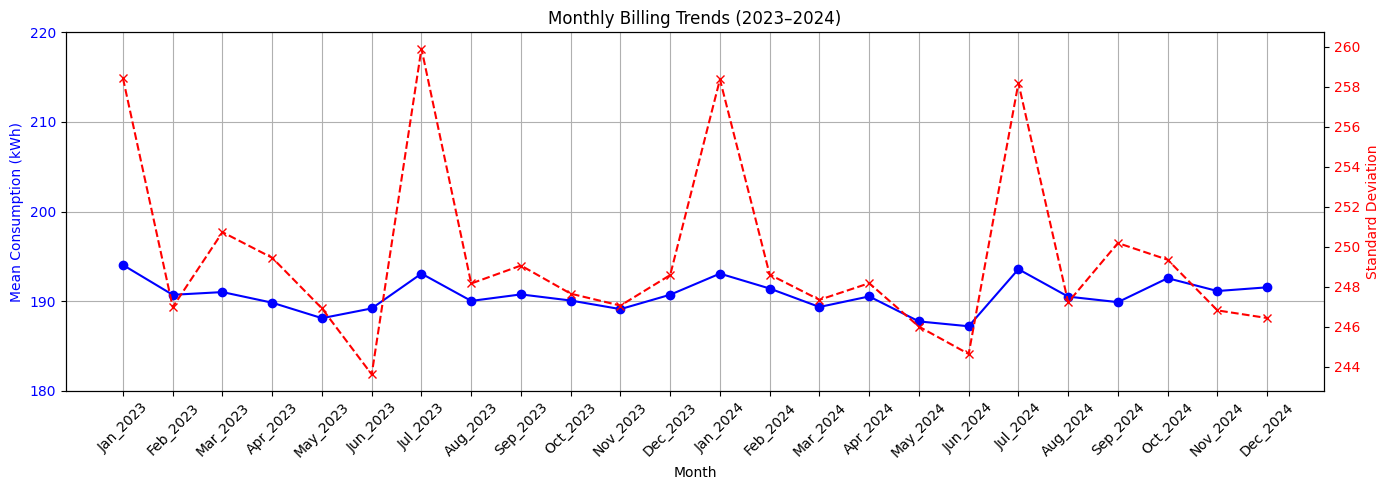

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data plotting
billing_cols = [col for col in df.columns if '_' in col and '20' in col]
monthly_mean = df[billing_cols].mean()
monthly_std = df[billing_cols].std()
fig, ax1 = plt.subplots(figsize=(14, 5))
ax1.plot(monthly_mean.index, monthly_mean.values, color='blue', marker='o', label='Mean kWh')
ax1.set_ylabel('Mean Consumption (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(180, monthly_mean.max() + 20)

# Set y-axis ticks at 10 intervals starting from 180
yticks = np.arange(180, monthly_mean.max() + 30, 10)
ax1.set_yticks(yticks)

# Plot std dev on twin axis
ax2 = ax1.twinx()
ax2.plot(monthly_std.index, monthly_std.values, color='red', marker='x', linestyle='--', label='Std Dev')
ax2.set_ylabel('Standard Deviation', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Format x-axis
ax1.set_title('Monthly Billing Trends (2023–2024)')
ax1.set_xlabel('Month')
ax1.set_xticks(range(len(billing_cols)))
ax1.set_xticklabels(billing_cols, rotation=45)
ax1.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Clean and fix 'Type' to keep all rows
df['Type'] = df['Type'].astype(str).str.strip()
df['Type'] = df['Type'].replace(['@', '', 'nan', 'None', ' '], '0')
df['Type'] = df['Type'].fillna('0')


In [ ]:
#Feature Engineering
import numpy as np

# Select billing columns
billing_cols = [col for col in df.columns if '_' in col and '20' in col]

# Basic billing stats
df['mean_kWh'] = df[billing_cols].mean(axis=1)
df['std_kWh'] = df[billing_cols].std(axis=1)
df['min_kWh'] = df[billing_cols].min(axis=1)
df['max_kWh'] = df[billing_cols].max(axis=1)
df['range_kWh'] = df['max_kWh'] - df['min_kWh']
# Add binary features to align with hotspot types

# High building density, low night-time light
df['High_BD_LowNTL'] = ((df['B_Density'] > df['B_Density'].median()) &
                        (df['Viirs2024'] < df['Viirs2024'].median())).astype(int)

# Bright light in low population
df['High_NTL_LowPop'] = ((df['Viirs2024'] > df['Viirs2024'].quantile(0.75)) &
                         (df['Kenpop2024'] < df['Kenpop2024'].median())).astype(int)

# Far from substation with NTL drop
df['FAR_SS_DECL_NTL'] = ((df['NEAR_DIST'] > df['NEAR_DIST'].quantile(0.75)) &
                         (df['Viirs2024'] < df['Viirs2023'])).astype(int)

# Spike in light in low building density areas
df['NL_SPIKE_LOW_BD'] = ((df['Viirs2024'] > df['Viirs2024'].quantile(0.75)) &
                         (df['B_Density'] < df['B_Density'].median())).astype(int)

# Spike in light in low population
df['NL_SPIKE_LOWPOP'] = ((df['Viirs2024'] > df['Viirs2024'].quantile(0.75)) &
                         (df['Kenpop2024'] < df['Kenpop2024'].median())).astype(int)

# Monthly changes
df['max_drop'] = df[billing_cols].diff(axis=1).min(axis=1)
df['max_spike'] = df[billing_cols].diff(axis=1).max(axis=1)

# Rolling average
df['rolling_avg_3mo'] = df[billing_cols].rolling(3, axis=1).mean().mean(axis=1)

# Percent change over time
df['pct_change_23_24'] = ((df['Dec_2024'] - df['Jan_2023']) / df['Jan_2023'].replace(0, np.nan)).fillna(0)

# Ratios
df['usage_per_building'] = (df['mean_kWh'] / df['B_Density'].replace(0, np.nan)).fillna(0)
df['ntl_to_pop_2024'] = (df['Viirs2024'] / df['Kenpop2024'].replace(0, np.nan)).fillna(0)
df['ntl_decline'] = df['Viirs2023'] - df['Viirs2024']
df['far_from_ss'] = (df['NEAR_DIST'] > 150).astype(int)

# Preview
print("Shape after features:", df.shape)
df.head()


Shape after features: (53486, 51)


,POINT_X,POINT_Y,Type,Jan_2023,Feb_2023,Mar_2023,Apr_2023,May_2023,Jun_2023,Jul_2023,...,NL_SPIKE_LOW_BD,NL_SPIKE_LOWPOP,max_drop,max_spike,rolling_avg_3mo,pct_change_23_24,usage_per_building,ntl_to_pop_2024,ntl_decline,far_from_ss
0,569206.3161,9561956.307,0,309.292,178.062,0.000,489.423,170.763,0.000,392.160,...,0,0,-768.688,497.886,118.682545,0.004591,0.000000,0.0,0.606692,0
1,569224.3218,9561996.834,0,186.700,345.135,72.977,0.000,-127.920,0.051,-66.161,...,0,0,-455.668,601.568,44.675000,-1.341585,0.000000,0.0,0.606692,1
2,569251.1344,9561781.785,0,168.807,169.628,170.521,171.014,172.458,172.152,173.950,...,0,0,-3.853,6.364,171.679242,0.031006,114415.326613,0.0,0.337122,1
3,569252.0000,9561856.000,0,585.081,327.325,387.208,390.757,322.379,-35.178,190.594,...,0,0,-516.019,696.526,332.707121,-0.332870,175201.956620,0.0,0.471907,0
4,569252.0000,9561856.000,0,2.131,483.337,1.777,-182.041,478.331,224.107,-2.239,...,0,0,-735.798,736.081,202.596091,124.091506,105067.466346,0.0,0.471907,0


In [ ]:
from sklearn.model_selection import train_test_split
df['Type'] = df['Type'].astype(str)
# Separate features and labels
X = df.drop(columns=['Type'])
y = df['Type']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Confirm shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (42788, 50)
Test shape: (10698, 50)


In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler

# Get numeric columns only
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit on training, transform both train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Preview
print("X_train normalized shape:", X_train.shape)
X_train.head()


X_train normalized shape: (42788, 50)


,POINT_X,POINT_Y,Jan_2023,Feb_2023,Mar_2023,Apr_2023,May_2023,Jun_2023,Jul_2023,Aug_2023,...,NL_SPIKE_LOW_BD,NL_SPIKE_LOWPOP,max_drop,max_spike,rolling_avg_3mo,pct_change_23_24,usage_per_building,ntl_to_pop_2024,ntl_decline,far_from_ss
672,-1.570034,-0.639118,0.453636,0.986975,1.113045,-0.056820,1.133547,1.509549,0.422647,0.534449,...,-0.272814,-0.202033,-0.176332,-0.460591,1.633169,-0.026116,-0.019721,5.322757,-0.763716,-0.946906
33635,0.188633,1.456311,1.613295,0.344607,0.707522,1.130338,-0.408043,0.400777,0.660103,-1.647158,...,-0.272814,-0.202033,-0.394919,1.330866,2.724892,-0.025927,-0.018515,-0.041369,-0.553882,-0.946906
46901,1.341127,1.785125,0.832635,0.598487,0.338482,2.410875,-0.753656,-0.780866,0.675700,1.775841,...,-0.272814,-0.202033,-0.500889,-0.309298,0.103013,-0.026066,-0.019519,-0.041449,-0.485363,-0.946906
45520,1.149704,0.979092,0.197151,0.292840,0.749338,1.244333,0.189769,-0.779052,0.700736,0.844009,...,-0.272814,-0.202033,0.678266,-0.723623,0.364374,-0.025963,-0.019088,-0.041258,0.830720,1.056071
29740,-0.178404,-0.056552,-0.190754,0.483479,0.404873,0.352394,-2.799845,-0.983926,-0.569855,0.998573,...,-0.272814,-0.202033,-0.482292,-0.144603,-0.471272,-0.025563,-0.017127,-0.040756,-0.298815,-0.946906


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a random forest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get importance scores
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and select top 15
top_features = importances.sort_values(ascending=False).head(15).index.tolist()

# Filter the training and test sets
X_train = X_train[top_features]
X_test = X_test[top_features]

# Preview selected features
print("Selected features:", top_features)


Selected features: ['std_kWh', 'range_kWh', 'Viirs2023', 'max_drop', 'ntl_to_pop_2024', 'Viirs2024', 'max_spike', 'max_kWh', 'Kenpop2024', 'ntl_decline', 'Kenpop2023', 'POINT_Y', 'POINT_X', 'B_Density', 'mean_kWh']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# View the class-to-number mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label encoding mapping:", label_mapping)


Label encoding mapping: {'0': np.int64(0), 'FAR_SS_DECL_NTL': np.int64(1), 'High_BD_LowNTL': np.int64(2), 'High_NTL_LowPop': np.int64(3), 'NL_SPIKE_LOWPOP': np.int64(4), 'NL_SPIKE_LOW_BD': np.int64(5)}


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Convert y_train_encoded to Series and reset indices
y_series = pd.Series(y_train_encoded).reset_index(drop=True)
X_train_reset = X_train.reset_index(drop=True)

# Filter out classes with fewer than 6 samples
valid_classes = [label for label, count in Counter(y_series).items() if count >= 6]

# Filter X and y based on valid classes
mask = y_series.isin(valid_classes)
X_train_filtered = X_train_reset[mask]
y_train_filtered = y_series[mask]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_filtered, y_train_filtered)

# Print class distributions
print("Before SMOTE:", Counter(y_series))
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({0: 40915, 2: 1106, 3: 478, 5: 279, 1: 7, 4: 3})
After SMOTE: Counter({0: 40915, 2: 40915, 1: 40915, 5: 40915, 3: 40915})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder

# Remap y_train_balanced to consecutive labels
unique_classes = sorted(set(y_train_balanced))
le_balanced = LabelEncoder()
le_balanced.fit(unique_classes)

# New mapped labels (e.g., 0, 1, 2, 3)
y_train_balanced_mapped = le_balanced.transform(y_train_balanced)

# Step 2: Reinitialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=len(le_balanced.classes_),
    random_state=42
)

lgb_model = LGBMClassifier(
    random_state=42,
    num_leaves=64,
    min_split_gain=0.0001,
    min_child_samples=10,
    max_depth=-1,
    n_estimators=100,
    learning_rate=0.1,
    verbose=-1
)

# Step 3: Train all models on balanced and remapped labels
rf_model.fit(X_train_balanced, y_train_balanced_mapped)
xgb_model.fit(X_train_balanced, y_train_balanced_mapped)
lgb_model.fit(X_train_balanced, y_train_balanced_mapped)

print(" Models trained on remapped balanced labels.")


 Models trained on remapped balanced labels.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)

# Decode predictions back to original labels
rf_labels = le.inverse_transform(rf_preds)
xgb_labels = le.inverse_transform(xgb_preds)
lgb_labels = le.inverse_transform(lgb_preds)
true_labels = le.inverse_transform(y_test_encoded)

# Classification reports
print("Random Forest Classification Report:\n")
print(classification_report(true_labels, rf_labels))

print("\nXGBoost Classification Report:\n")
print(classification_report(true_labels, xgb_labels))

print("\nLightGBM Classification Report:\n")
print(classification_report(true_labels, lgb_labels))


Random Forest Classification Report:

                 precision    recall  f1-score   support

              0       1.00      1.00      1.00     10230
FAR_SS_DECL_NTL       0.33      1.00      0.50         1
 High_BD_LowNTL       0.94      0.98      0.96       277
High_NTL_LowPop       0.93      0.93      0.93       119
NL_SPIKE_LOWPOP       0.00      0.00      0.00         1
NL_SPIKE_LOW_BD       0.00      0.00      0.00        70

       accuracy                           0.99     10698
      macro avg       0.53      0.65      0.56     10698
   weighted avg       0.99      0.99      0.99     10698


XGBoost Classification Report:

                 precision    recall  f1-score   support

              0       1.00      1.00      1.00     10230
FAR_SS_DECL_NTL       0.33      1.00      0.50         1
 High_BD_LowNTL       0.97      1.00      0.98       277
High_NTL_LowPop       0.97      1.00      0.98       119
NL_SPIKE_LOWPOP       0.00      0.00      0.00         1
NL_SPIKE_LOW_

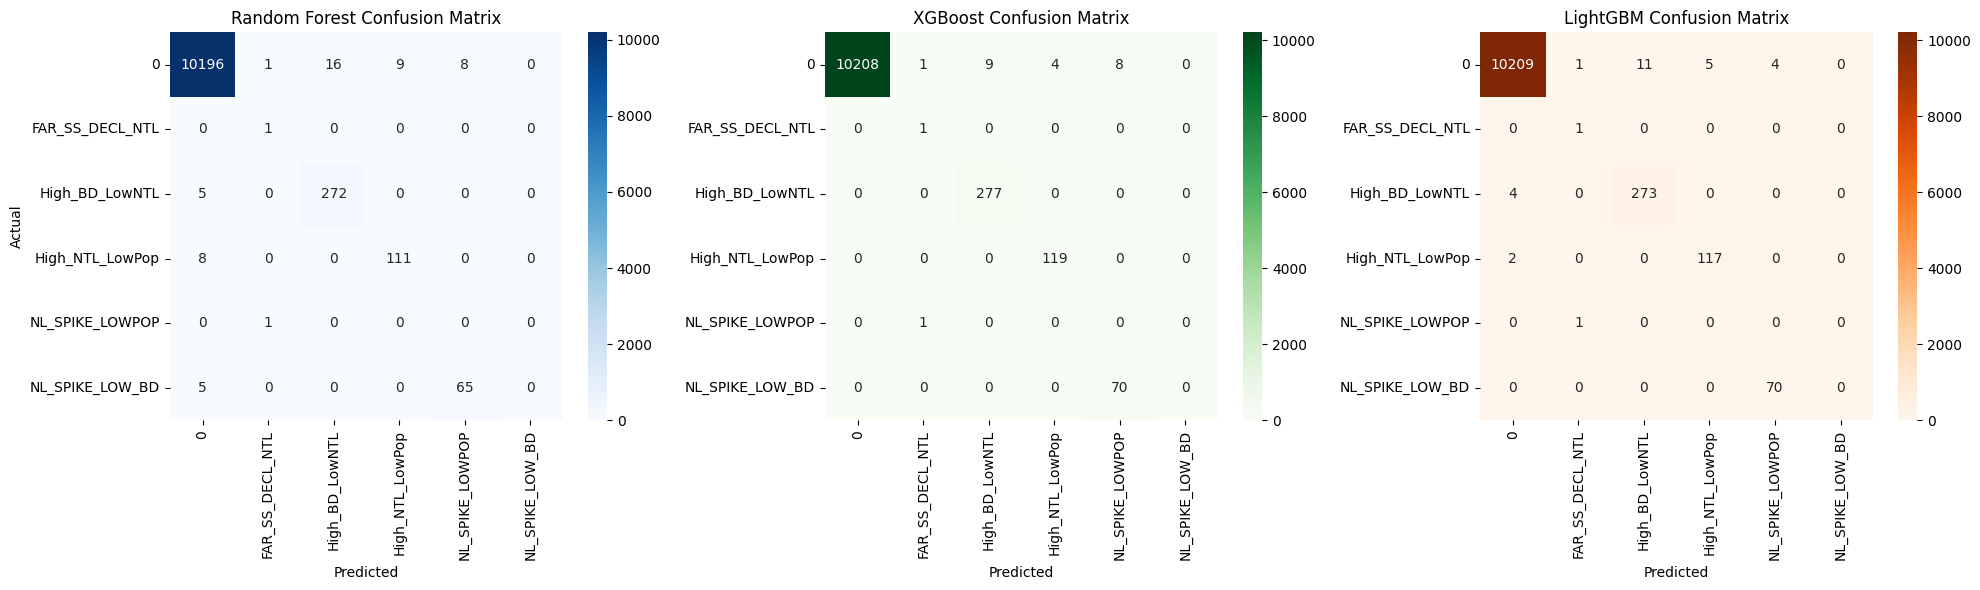

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Random Forest
cm_rf = confusion_matrix(true_labels, rf_labels, labels=le.classes_)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# XGBoost
cm_xgb = confusion_matrix(true_labels, xgb_labels, labels=le.classes_)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

# LightGBM
cm_lgb = confusion_matrix(true_labels, lgb_labels, labels=le.classes_)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[2])
axes[2].set_title("LightGBM Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get predicted probabilities from each model
rf_probs = rf_model.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)
lgb_probs = lgb_model.predict_proba(X_test)

# Average the probabilities
avg_probs = (rf_probs + xgb_probs + lgb_probs) / 3

# Final predicted class is the one with highest averaged probability
ensemble_preds = np.argmax(avg_probs, axis=1)

# Decode labels
ensemble_labels = le.inverse_transform(ensemble_preds)
true_labels = le.inverse_transform(y_test_encoded)

# Classification report
print("Ensemble Classification Report:\n")
print(classification_report(true_labels, ensemble_labels))


Ensemble Classification Report:

                 precision    recall  f1-score   support

              0       1.00      1.00      1.00     10230
FAR_SS_DECL_NTL       0.33      1.00      0.50         1
 High_BD_LowNTL       0.97      0.99      0.98       277
High_NTL_LowPop       0.96      0.99      0.98       119
NL_SPIKE_LOWPOP       0.00      0.00      0.00         1
NL_SPIKE_LOW_BD       0.00      0.00      0.00        70

       accuracy                           0.99     10698
      macro avg       0.54      0.66      0.58     10698
   weighted avg       0.99      0.99      0.99     10698



In [ ]:
import joblib

# Define a custom class to hold all 3 models and averaging logic
class EnsembleAverager:
    def __init__(self, rf, xgb, lgb, encoder):
        self.rf = rf
        self.xgb = xgb
        self.lgb = lgb
        self.encoder = encoder

    def predict(self, X):
        rf_probs = self.rf.predict_proba(X)
        xgb_probs = self.xgb.predict_proba(X)
        lgb_probs = self.lgb.predict_proba(X)
        avg_probs = (rf_probs + xgb_probs + lgb_probs) / 3
        preds = np.argmax(avg_probs, axis=1)
        return preds

    def predict_labels(self, X):
        preds = self.predict(X)
        return self.encoder.inverse_transform(preds)

# Create the object
ensemble_model = EnsembleAverager(rf_model, xgb_model, lgb_model, le)

# Save it
joblib.dump(ensemble_model, "PowerTheft_model_balanced.pkl")



['PowerTheft_model_balanced.pkl']

In [ ]:
# Predict on all meterboxes
X_full = df[selected_features]
ensemble_preds = ensemble_model.predict(X_full)

# Decode if label encoder was used
ensemble_labels = le_balanced.inverse_transform(ensemble_preds)

# Attach to original dataframe
df['Predicted_Type'] = ensemble_labels

# ✅ Now filter only predicted theft cases (≠ '0')
predicted_theft = df[df['Predicted_Type'] != '0']  # or != 0 if integer

# Preview
print("✅ Total predicted theft cases:", predicted_theft.shape[0])
print(predicted_theft['Predicted_Type'].value_counts())

# Export only theft cases
predicted_theft.to_csv("predicted_theft_cases_only.csv", index=False)


NameError: name 'selected_features' is not defined